## MICROSOFT STUDIO PROJECT

<br>

#### Author: Daniel Muruthi

________________________________________________________

## OVERVIEW

#### The project's aim is to aid the Microsoft team in choosing the type of films to create as well as gaining an understanding of what drives sales in the film industry. For my data source I will be using IMDb and Box Office Mojo data sources, the two which are arguably the most popular and authoritative sources for films, television series, podcasts, home videos, video games, and streaming content online.
#### From this using Exploratory Data Analysis, I will obtain insights from the data and make reccomendations

_______________________________________________________

In [2]:
#Importing standard packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import re
from itertools import chain
from collections import Counter
import seaborn as sns

# 1.
### Data Analysis

In [3]:
### I Will Start By Connecting To Our IMDB Database
conn = sqlite3.connect("im.db")
im_data = pd.read_sql("SELECT * FROM sqlite_master WHERE type=\'table\';", conn)
im_data.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


### From our database movie_basics and movie_ratings tables contain data the relevant data to our study

In [4]:
# Analysing the contents in our movie_basics table
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn).head()
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# Analysing the contents in our movie_ratings table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn).head()
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Our Data shares a common movie_id which we will use in joining movie_basics and movie_ratings.
#### Since our database is huge, I will use a sample of 1000 rows

In [6]:
basics_ratings_table = pd.read_sql("SELECT * FROM movie_ratings b FULL OUTER JOIN movie_basics a USING(movie_id) LIMIT 1000;", conn)
basics_ratings_table

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
995,tt1728640,7.1,7,Kotona kylässä,Kotona kylässä,2012,58.0,Documentary
996,tt1731697,5.1,25089,The Lords of Salem,The Lords of Salem,2012,101.0,"Horror,Thriller"
997,tt1732177,6.4,18,Un mundo casi perfecto,Un mundo casi perfecto,2011,NaN,Comedy
998,tt1733536,6.5,145,Love Child,La hija natural,2011,97.0,"Drama,Romance"


### As I need to assist Microsoft in deciding which films to make, Let's take a look at which Movie genres are popular amongst viewers

#### make our flattened genre list unique and count how many times it appears

In [7]:
unique_genres = [re.split(',', str(i)) for i in basics_ratings_table['genres']]
genre_list = []
count = 0

for genre in unique_genres:
    if len(genre) > 1:
        while count < len(genre):
            genre_list.append(genre[count])
            count += 1
    else:
        genre_list.append(str(genre).strip("[]'"))
genre_dict = Counter(genre_list)
genre_dict

Counter({'Drama': 163,
         'Documentary': 147,
         'Comedy': 79,
         'Horror': 45,
         'Thriller': 16,
         'Action': 14,
         'Romance': 13,
         'Fantasy': 5,
         'Animation': 5,
         'None': 4,
         'Adventure': 2,
         'Family': 2,
         'Biography': 2,
         'History': 2,
         'Crime': 2,
         'Sci-Fi': 1,
         'Sport': 1,
         'Mystery': 1,
         'Musical': 1,
         'Western': 1})

### From Our Data We Can See That The Top Movie Genres To Make Are:

In [8]:
#Top 10
top_ten_genres = list(sorted(genre_dict.items(), key = lambda x: x[1], reverse=True))[:10]
top_ten_genres

[('Drama', 163),
 ('Documentary', 147),
 ('Comedy', 79),
 ('Horror', 45),
 ('Thriller', 16),
 ('Action', 14),
 ('Romance', 13),
 ('Fantasy', 5),
 ('Animation', 5),
 ('None', 4)]

Text(0.5, 1.0, 'Number of Movies Made By Genre')

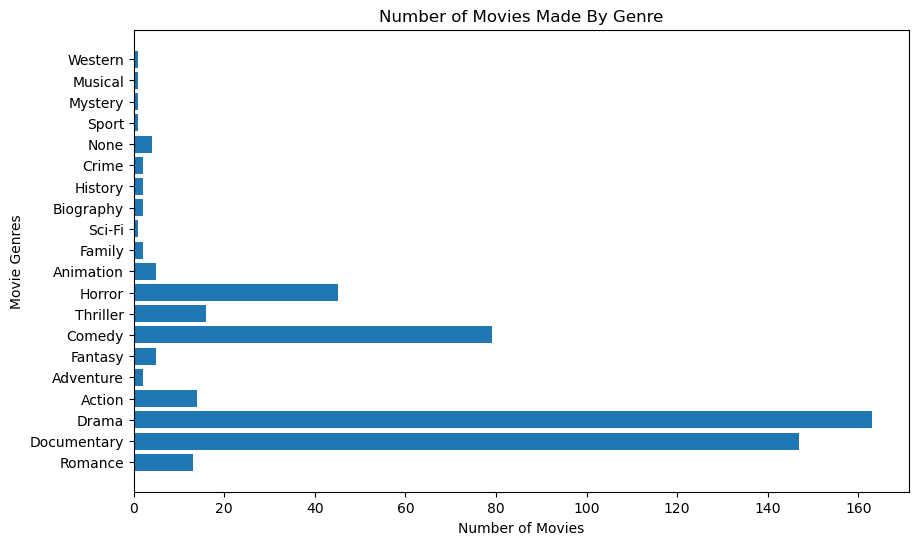

In [9]:
# Let's Plot a bargraph to show distribution of movie genres made in our sample data
genre_dict
genre_names = list(genre_dict.keys())
genre_freq = list(genre_dict.values())
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y=genre_names, width=genre_freq)
ax.set_xlabel("Number of Movies")
ax.set_ylabel("Movie Genres")
ax.set_title("Number of Movies Made By Genre")

### To Know What Types of Movies Are Doing Well At The Box Office Let's Plot The Genres Against The Average Rating

#### For This Part I will Use The Unflattened/Original Movie Genre Column Due To The Nature Of Our DataBase

In [10]:
# creating a new dataframe
gen_av = basics_ratings_table.groupby('movie_id')[['genres','averagerating']].head(10)
gen_av

,genres,averagerating
0,Romance,8.3
1,Documentary,8.9
2,Drama,6.4
3,"Action,Adventure,Fantasy",4.2
4,"Mystery,Thriller",6.5
...,...,...
995,Documentary,7.1
996,"Horror,Thriller",5.1
997,Comedy,6.4
998,"Drama,Romance",6.5


In [11]:
# Let's look for NaN objects and if they exist let's Clean the data
gen_av.isna().sum()

genres           4
averagerating    0
dtype: int64

In [12]:
# Dropping rows whose genres column value is NaN
gen_av = gen_av.dropna(subset=['genres'], axis=0, how="any")
unflattened_genres = [i for i in gen_av['genres']]
unflattened_genres[:10]

['Romance',
 'Documentary',
 'Drama',
 'Action,Adventure,Fantasy',
 'Mystery,Thriller',
 'Comedy,Romance',
 'Biography,Drama,Sport',
 'Drama,Thriller',
 'Drama,War',
 'Action,Adventure,Sci-Fi']

In [13]:
#Creating a list of our average rating data via list comprehension
average_ratings = [i for i in gen_av['averagerating']]
average_ratings[:10]

[8.3, 8.9, 6.4, 4.2, 6.5, 6.2, 7.0, 6.4, 7.2, 4.2]

#### Due to the scale of the Data I will limit the genres to 100

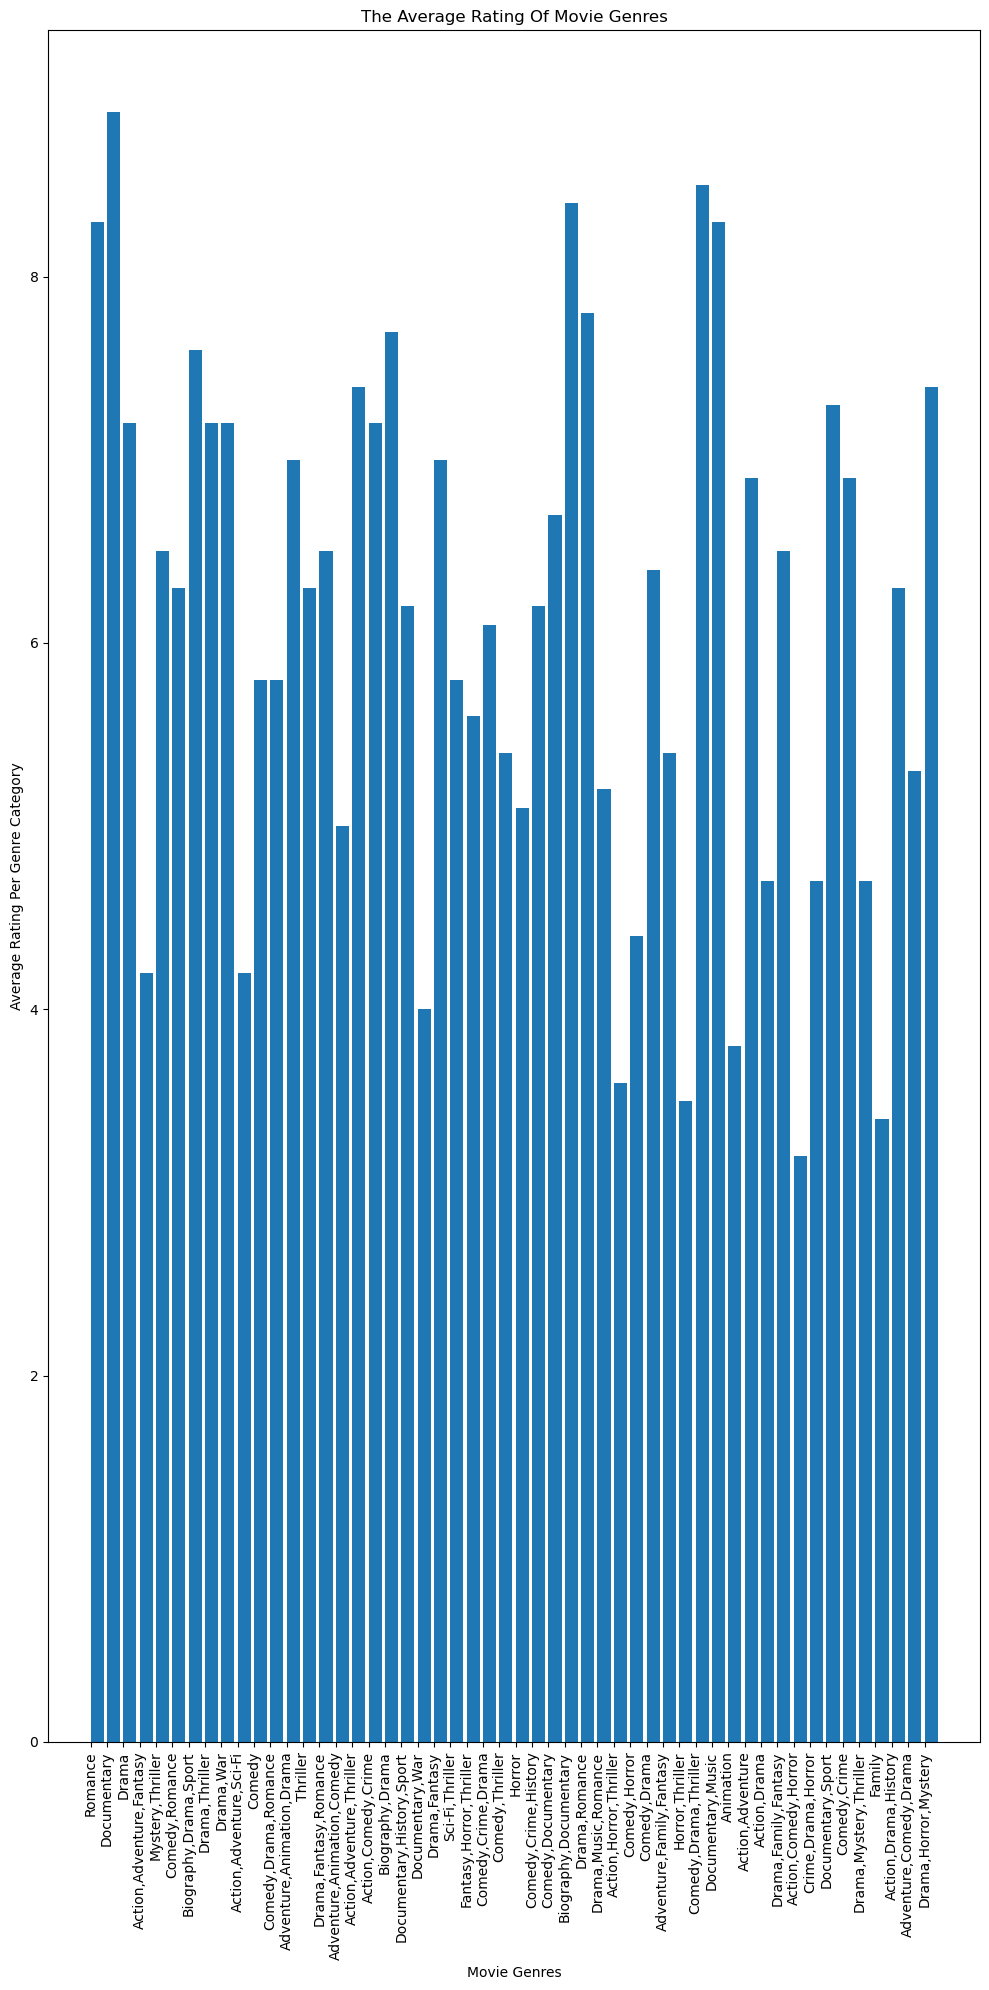

In [15]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.bar(x=unflattened_genres[:100], height=average_ratings[:100], linewidth=3, align="edge")
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel("Average Rating Per Genre Category")
ax.set_xlabel("Movie Genres")
ax.set_title("The Average Rating Of Movie Genres")
plt.tight_layout()

### Let's get some Measures of Central Tendancy And Dispersion on Average rating

In [16]:
gen_av['averagerating'].describe()

count    996.000000
mean       6.355422
std        1.475393
min        1.000000
25%        5.500000
50%        6.500000
75%        7.400000
max        9.700000
Name: averagerating, dtype: float64

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


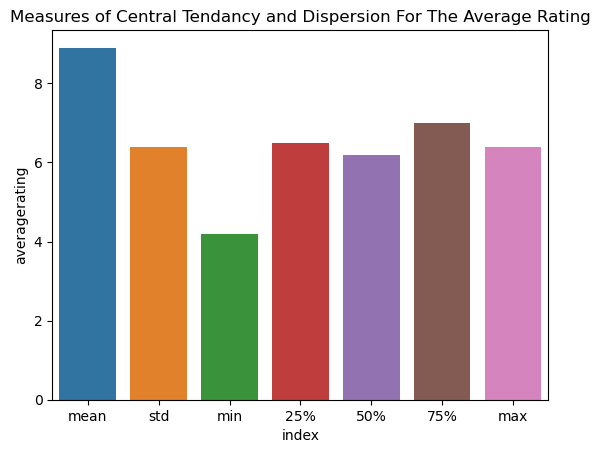

In [17]:
gen_av_describe = gen_av.describe(include=['int64','float64'])
gen_av_describe.reset_index(inplace=True)
# To remove any variable from plot
gen_av_describe = gen_av_describe[gen_av_describe['index'] != 'count']
sns_gen_av = sns.barplot(x="index", y = gen_av['averagerating'], data=gen_av_describe)
sns_gen_av.set_title('Measures of Central Tendancy and Dispersion For The Average Rating')
plt.show()

# 2. As average rating is based on votes from viewers, let's see which genres have the most number of voters to see popularity of the genre

In [18]:
# Creating a new dataframe
gen_num = basics_ratings_table.groupby('movie_id')[['primary_title','genres','numvotes']].head(10)
gen_num = gen_num.sort_values('numvotes', ascending=False)
gen_num

,primary_title,genres,numvotes
758,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy",691835
760,Iron Man 2,"Action,Adventure,Sci-Fi",657690
193,The Revenant,"Action,Adventure,Biography",621193
20,21 Jump Street,"Action,Comedy,Crime",477771
19,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",428142
...,...,...,...
566,Avarkkoppam,Family,5
166,Thunderlust (and the Middle Beast),"Comedy,Music",5
643,Memory/Lies,Drama,5
570,Azzurro,Romance,5


#### Let's pick the top 50 genres with the most number of voters who are true fans

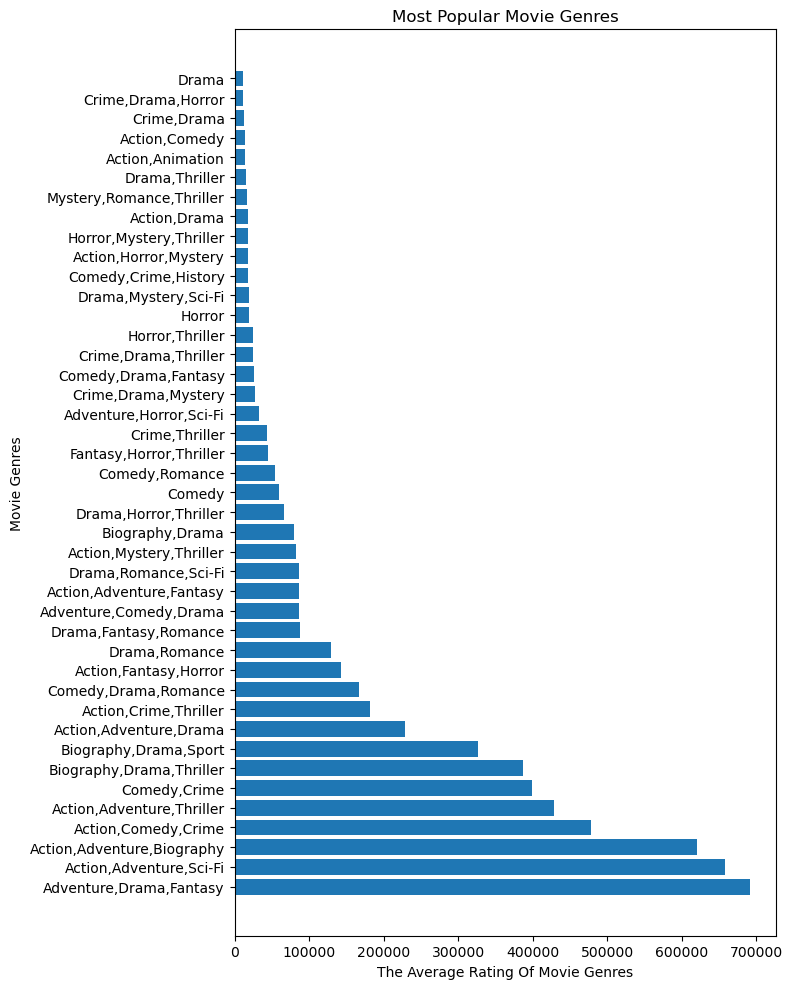

In [19]:
fig, ax1 = plt.subplots(figsize=(8, 10))
ax1.barh(y=gen_num['genres'].head(50), width=gen_num['numvotes'].head(50))
ax1.set_title("Most Popular Movie Genres")
ax1.set_ylabel("Movie Genres")
ax1.set_xlabel("The Average Rating Of Movie Genres")
plt.tight_layout()

# 3.
### QUESTION: DO PEOPLE PREFER LONG MOVIES OR SHORT ONES. lETS SEE WHAT THE DATA HAS TO SAY

#### Let's compare runtime_minutes vs average ratings

In [21]:
# new_dataframe
ave_run = basics_ratings_table.groupby('movie_id')[['averagerating','runtime_minutes']].head(10)
ave_run = ave_run.sort_values('averagerating', ascending=False)
ave_run

,averagerating,runtime_minutes
516,9.7,87.0
634,9.5,78.0
385,9.4,100.0
734,9.4,NaN
744,9.3,95.0
...,...,...
574,1.7,86.0
656,1.7,55.0
707,1.7,108.0
255,1.4,85.0


##### Lets see the state of our Data and If we have Any NULL or NONE values

In [22]:
ave_run.isna().sum()

averagerating        0
runtime_minutes    109
dtype: int64

##### About 10% of the data in our runtime_minutes is NaN
##### We will drop those columns

In [23]:
# dropping NaN values
ave_run = ave_run.dropna(subset=['runtime_minutes'], axis=0, how="any")
runtime_mins = [i for i in ave_run['runtime_minutes']]
runtime_mins[:10]

[87.0, 78.0, 100.0, 95.0, 130.0, 80.0, 89.0, 108.0, 92.0, 70.0]

In [24]:
ave_rating = [i for i in ave_run['averagerating']]
ave_rating[:10]

[9.7, 9.5, 9.4, 9.3, 9.3, 9.2, 9.2, 9.2, 9.2, 9.1]

#### Let us use the runtime to analyse the ratings

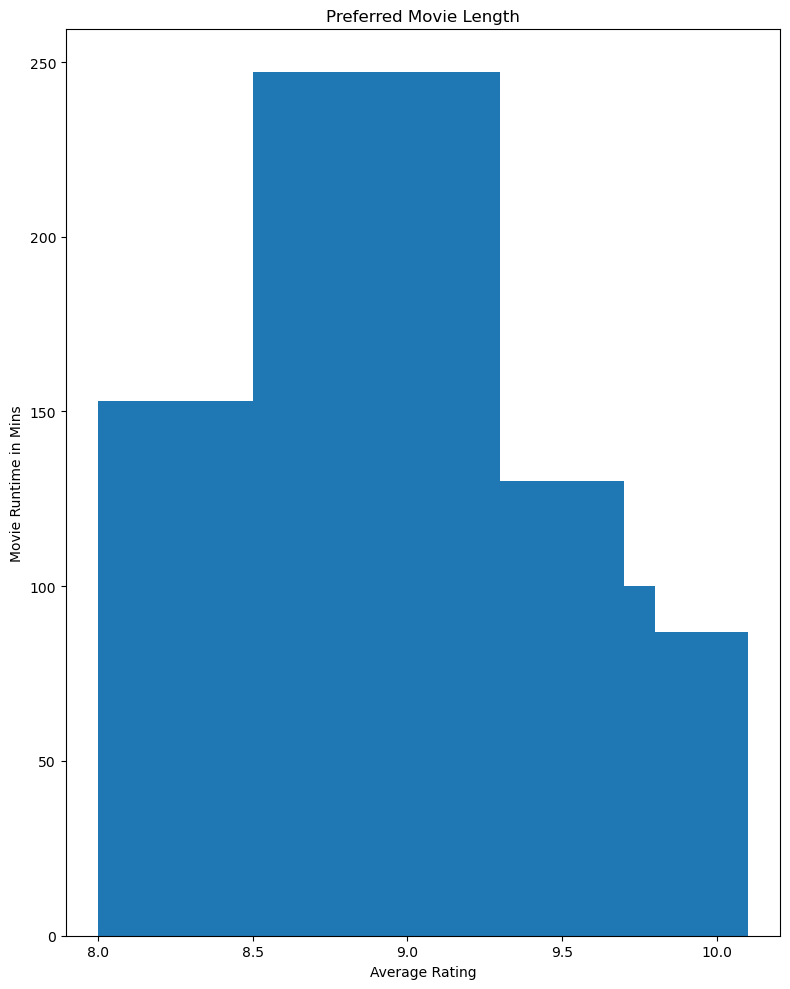

In [25]:
fig, ax2 = plt.subplots(figsize=(8, 10))
ax2.bar(x=ave_run['averagerating'].head(50), height=ave_run['runtime_minutes'].head(50), linewidth=3)
ax2.set_title("Preferred Movie Length")
ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Movie Runtime in Mins")
plt.tight_layout()

### -> From the Data we can see that a majority of people prefer movies to be long

_________________________________________________________________________________________________________________________________________________________________________________________________

# 4.
## Let us analyse our second data source

In [28]:
data = pd.read_csv("bom.movie_gross.csv")
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Lets Merge Our Two Data Sources to get more insights. We can see that the title in data and primary_title in our dataframe basics_ratings_table are similar

In [29]:
im_bom = pd.merge(data, basics_ratings_table, how='inner', left_on='title', right_on='primary_title')
im_bom.head(50)

,title,studio,domestic_gross,foreign_gross,year,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,7.0,657690,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
1,Sex and the City 2,WB (NL),95300000.0,193000000,2010,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"Comedy,Drama,Romance"
2,Eat Pray Love,Sony,80600000.0,124000000,2010,tt0879870,5.8,77709,Eat Pray Love,Eat Pray Love,2010,133.0,"Drama,Romance"
3,Hereafter,WB,32700000.0,72500000,2010,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance"
4,Letters to Juliet,Sum.,53000000.0,26100000,2010,tt0892318,6.6,86137,Letters to Juliet,Letters to Juliet,2010,105.0,"Adventure,Comedy,Drama"
5,Remember Me,Sum.,19100000.0,37000000,2010,tt1403981,7.1,129443,Remember Me,Remember Me,2010,113.0,"Drama,Romance"
6,Machete,Fox,26600000.0,17500000,2010,tt0985694,6.6,182320,Machete,Machete,2010,105.0,"Action,Crime,Thriller"
7,Going the Distance,WB (NL),17800000.0,24200000,2010,tt1322312,6.3,54421,Going the Distance,Going the Distance,2010,102.0,"Comedy,Romance"
8,We Are Family,UTV,638000.0,393000,2010,tt1714920,5.0,259,We Are Family,Moya bezumnaya semya,2012,100.0,Comedy
9,Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000,2011,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"


_________________________________________________________________________________________________________________________________________________________________________________________________

### Lets investigate user feedback i.e., averagerating vs both domestic and foreign_gross
### Does high average rating equate to more income a movie generates?

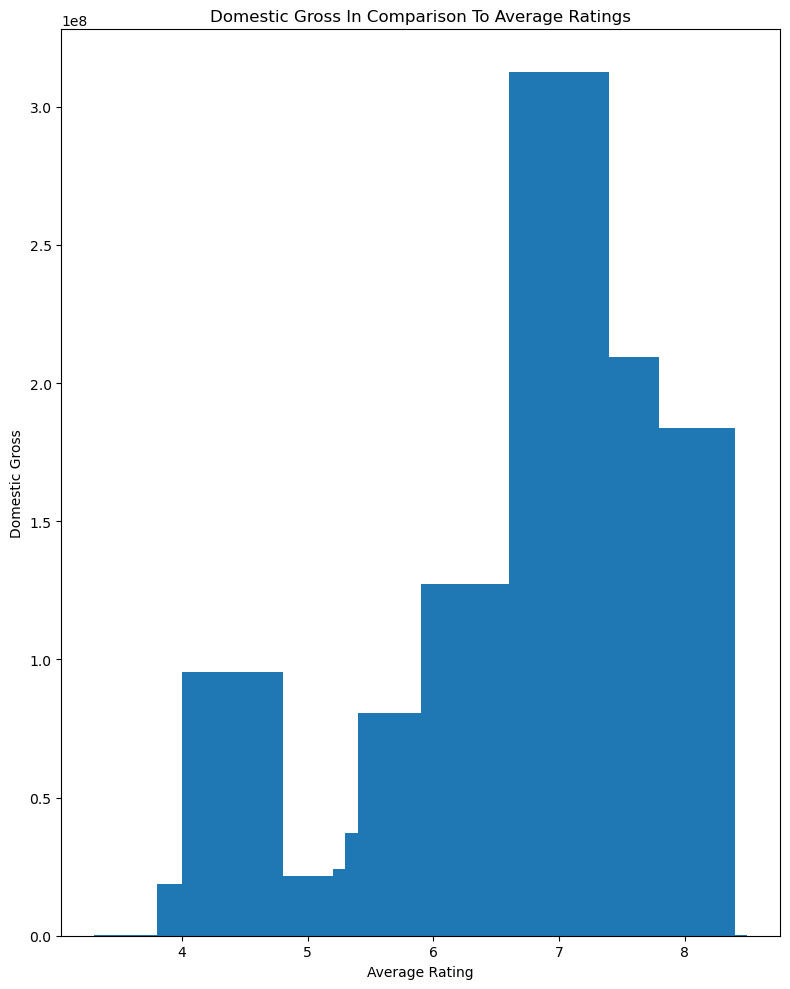

In [30]:
#Domestic Gross vs averagerating
fig, ax3 = plt.subplots(figsize=(8, 10))
ax3.bar(x=im_bom['averagerating'].head(50), height=im_bom['domestic_gross'].head(50))
ax3.set_title("Domestic Gross In Comparison To Average Ratings")
ax3.set_xlabel("Average Rating")
ax3.set_ylabel("Domestic Gross")
plt.tight_layout()

### -> From the bar graph we can see that it is left skewed. We also see that income is generally higher when the average rating is high

In [31]:
im_bom.describe()

,domestic_gross,year,averagerating,numvotes,start_year,runtime_minutes
count,6.200000e+01,63.000000,63.000000,63.000000,63.000000,61.000000
mean,3.265153e+07,2013.000000,6.331746,86765.349206,2012.333333,109.770492
std,5.887941e+07,2.546345,1.060862,150541.822269,2.533645,18.319747
min,2.600000e+03,2010.000000,3.700000,6.000000,2010.000000,55.000000
25%,1.672500e+05,2011.000000,5.700000,3822.000000,2010.000000,99.000000
50%,1.950000e+06,2012.000000,6.400000,18206.000000,2011.000000,106.000000
75%,3.540000e+07,2015.000000,7.050000,85978.500000,2013.000000,121.000000
max,3.124000e+08,2018.000000,8.500000,657690.000000,2019.000000,156.000000


### Let's try a different visualization method, scatterplot

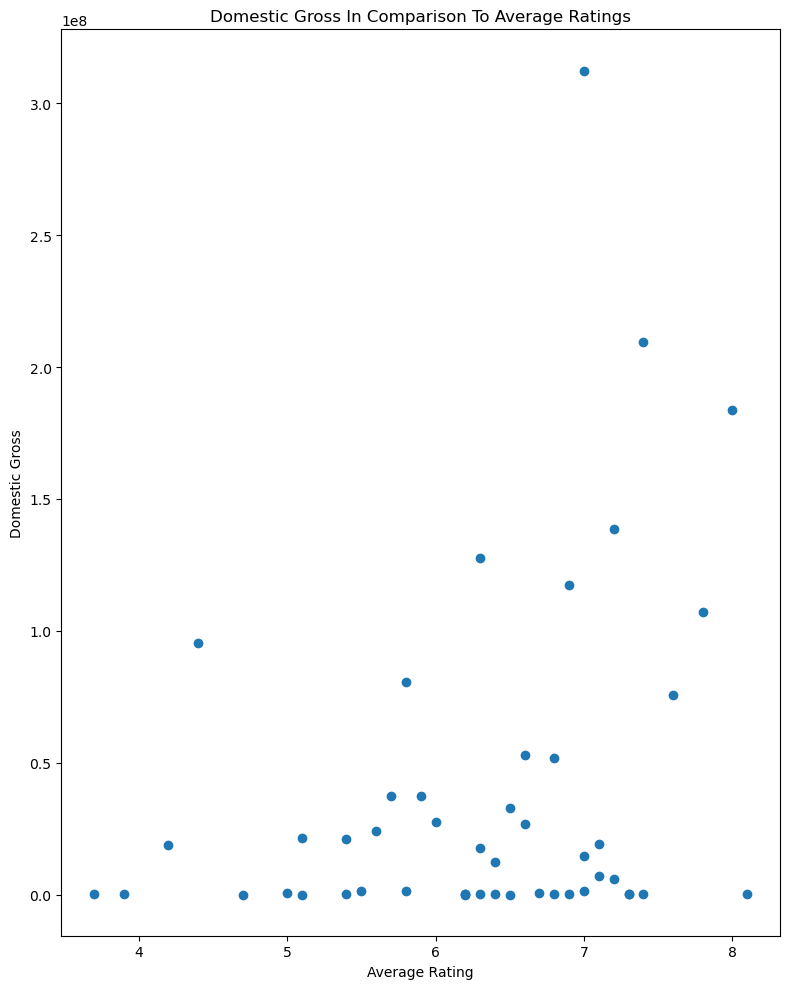

In [32]:
#Domestic Gross vs averagerating Scatterplot
fig, ax4 = plt.subplots(figsize=(8, 10))
ax4.scatter(x=im_bom['averagerating'].head(50), y=im_bom['domestic_gross'].head(50))
ax4.set_title("Domestic Gross In Comparison To Average Ratings")
ax4.set_xlabel("Average Rating")
ax4.set_ylabel("Domestic Gross")
plt.tight_layout()

### -> We can see a weak positive linear correlation

### Lets investigate the foreign_gross and see whether it defers from the domestic_gross

In [34]:
# Let's first check the type of data in the foreign_gross column
type(im_bom['foreign_gross'][0])

str

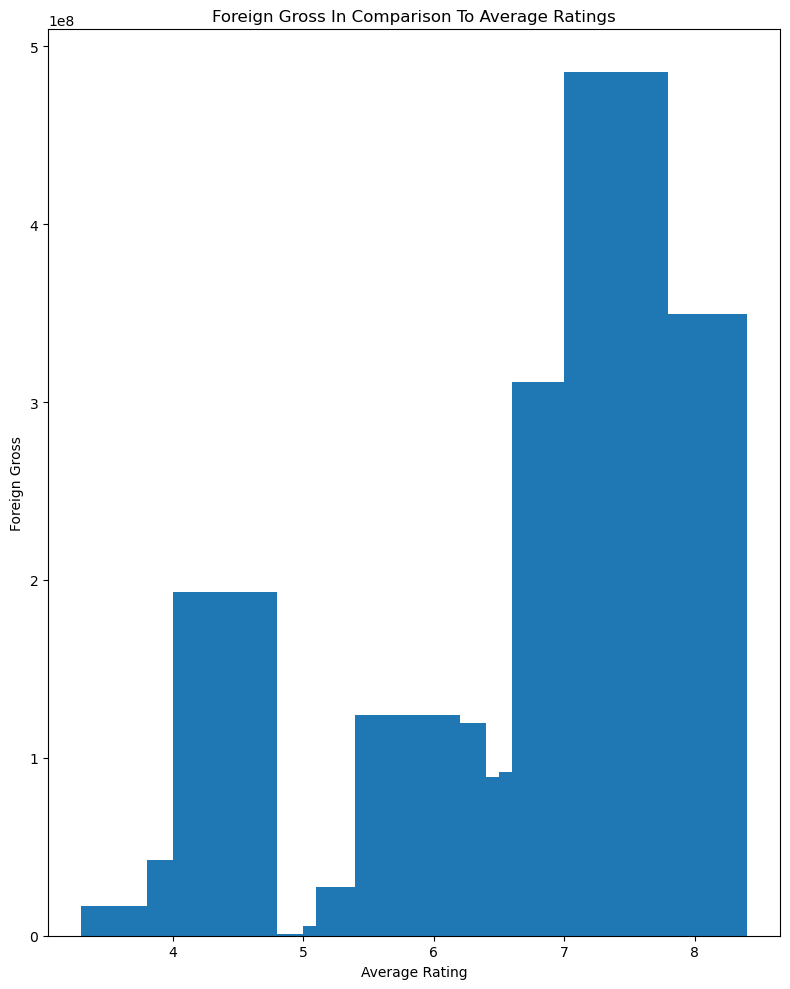

In [35]:
#Foreign Gross vs averagerating
fig, ax3 = plt.subplots(figsize=(8, 10))
ax3.bar(x=im_bom['averagerating'].head(50), height=im_bom['foreign_gross'].astype(float).head(50))
ax3.set_title("Foreign Gross In Comparison To Average Ratings")
ax3.set_xlabel("Average Rating")
ax3.set_ylabel("Foreign Gross")
plt.tight_layout()

### -> From the above bar graph we can see that the movies that made most money was highly rated by its fans, almost similar to the domestic_gross graph

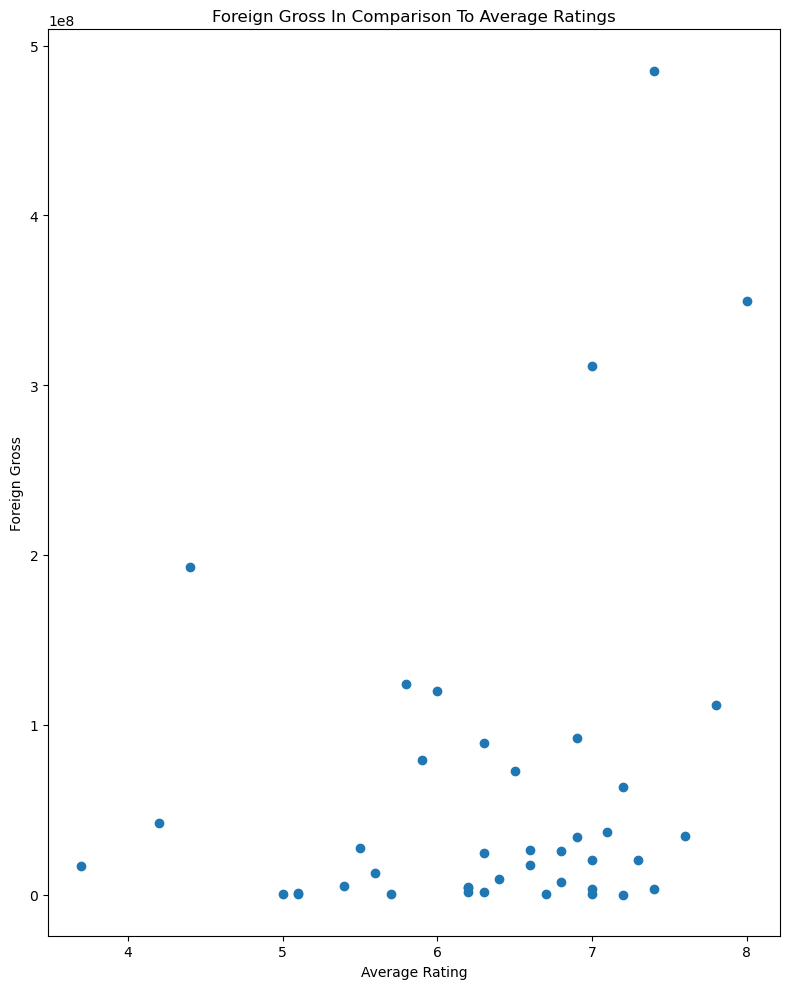

In [36]:
#Foreign Gross vs averagerating Scatter Plot
fig, ax3 = plt.subplots(figsize=(8, 10))
ax3.scatter(x=im_bom['averagerating'].head(50), y=im_bom['foreign_gross'].astype(float).head(50))
ax3.set_title("Foreign Gross In Comparison To Average Ratings")
ax3.set_xlabel("Average Rating")
ax3.set_ylabel("Foreign Gross")
plt.tight_layout()

### -> From The scatter plot we can see a weak positive linear relationship, implying there might be another factor that cause the high sales

_________________________________________________________________________________________________________________________________________________________________________________________________

#### Let's See The Best Performing Movie Studios
##### "Know thy enemy, know thy self" - sun tzu

In [37]:
# New dataframe with the studio and domestic_gross columns
stu_gross = im_bom.groupby('title')[['studio','domestic_gross']].head(10)
stu_gross = stu_gross.sort_values('domestic_gross', ascending=False)
stu_gross

,studio,domestic_gross
0,Par.,312400000.0
9,Par.,209400000.0
45,Fox,183600000.0
22,Sony,138400000.0
49,WB (NL),127400000.0
...,...,...
33,Magn.,5500.0
18,IFC,4800.0
44,VE,4300.0
21,Magn.,2600.0


In [38]:
# Let's check for Null values
stu_gross.isna().sum()

studio            0
domestic_gross    1
dtype: int64

In [39]:
# Dropping Null Values from domestic gross and rows that contained them
stu_gross = stu_gross.dropna(subset=['domestic_gross'], axis=0, how="any")
new_stu_gross = [i for i in stu_gross['domestic_gross']]
new_stu_gross[:10]

[312400000.0,
 209400000.0,
 183600000.0,
 138400000.0,
 127400000.0,
 117500000.0,
 107100000.0,
 95300000.0,
 80600000.0,
 75600000.0]

/tmp/ipykernel_16283/3365341389.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(stu_gross['studio'], rotation=90)


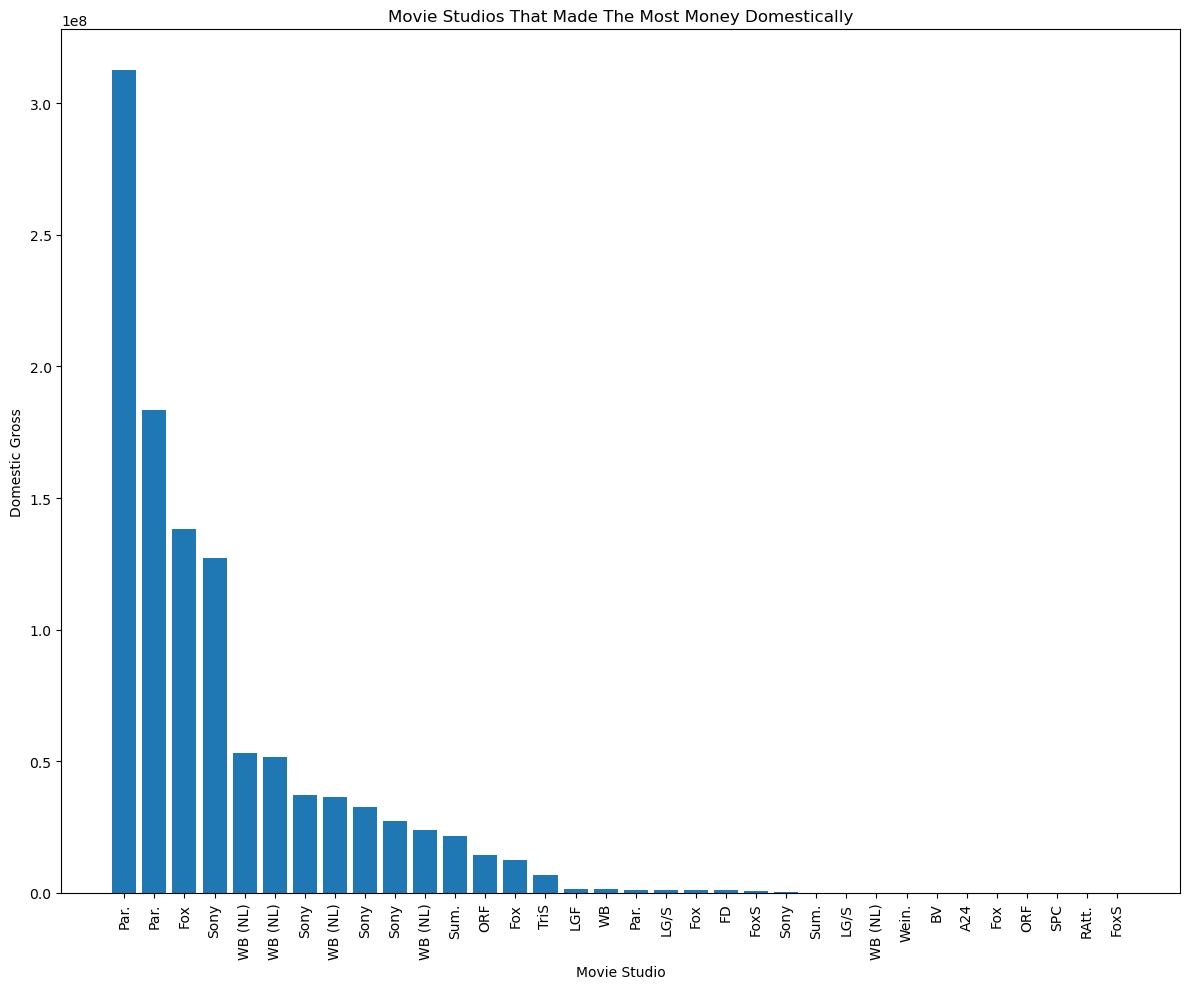

In [40]:
fig, ax6 = plt.subplots(figsize=(12, 10))
ax6.bar(x=stu_gross['studio'], height=new_stu_gross)
ax6.set_title("Movie Studios That Made The Most Money Domestically")
ax6.set_xlabel("Movie Studio")
ax6.set_ylabel("Domestic Gross")
ax6.set_xticklabels(stu_gross['studio'], rotation=90)
plt.tight_layout()

#### Let's Investigate The companies that made the most foreign_gross


In [41]:
# convert foreign gross values to floats and create new dataframe
im_bom['foreign_gross'] = im_bom['foreign_gross'].astype(float)
for_gross = im_bom.groupby('title')[['studio','foreign_gross']].head(10)
for_gross = for_gross.sort_values('foreign_gross', ascending=False)
for_gross

,studio,foreign_gross
9,Par.,485300000.0
45,Fox,349300000.0
0,Par.,311500000.0
1,WB (NL),193000000.0
2,Sony,124000000.0
...,...,...
56,CJ,NaN
58,Eros,NaN
59,PackYourBag,NaN
60,RAtt.,NaN


In [42]:
for_gross.isna().sum()
### Our foreign_gross column has 15 NaN objects.
### Lets drop the rows with foreign_gross NaN cells

studio            0
foreign_gross    15
dtype: int64

In [43]:
# dropping NaN values
for_gross = for_gross.dropna(subset=['foreign_gross'], axis=0, how="any")
new_for_gross = [i for i in for_gross['foreign_gross']]
new_for_gross[:10]


[485300000.0,
 349300000.0,
 311500000.0,
 193000000.0,
 124000000.0,
 119600000.0,
 111700000.0,
 96200000.0,
 92100000.0,
 89500000.0]

/tmp/ipykernel_16283/2521192848.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax7.set_xticklabels(for_gross['studio'], rotation=90)


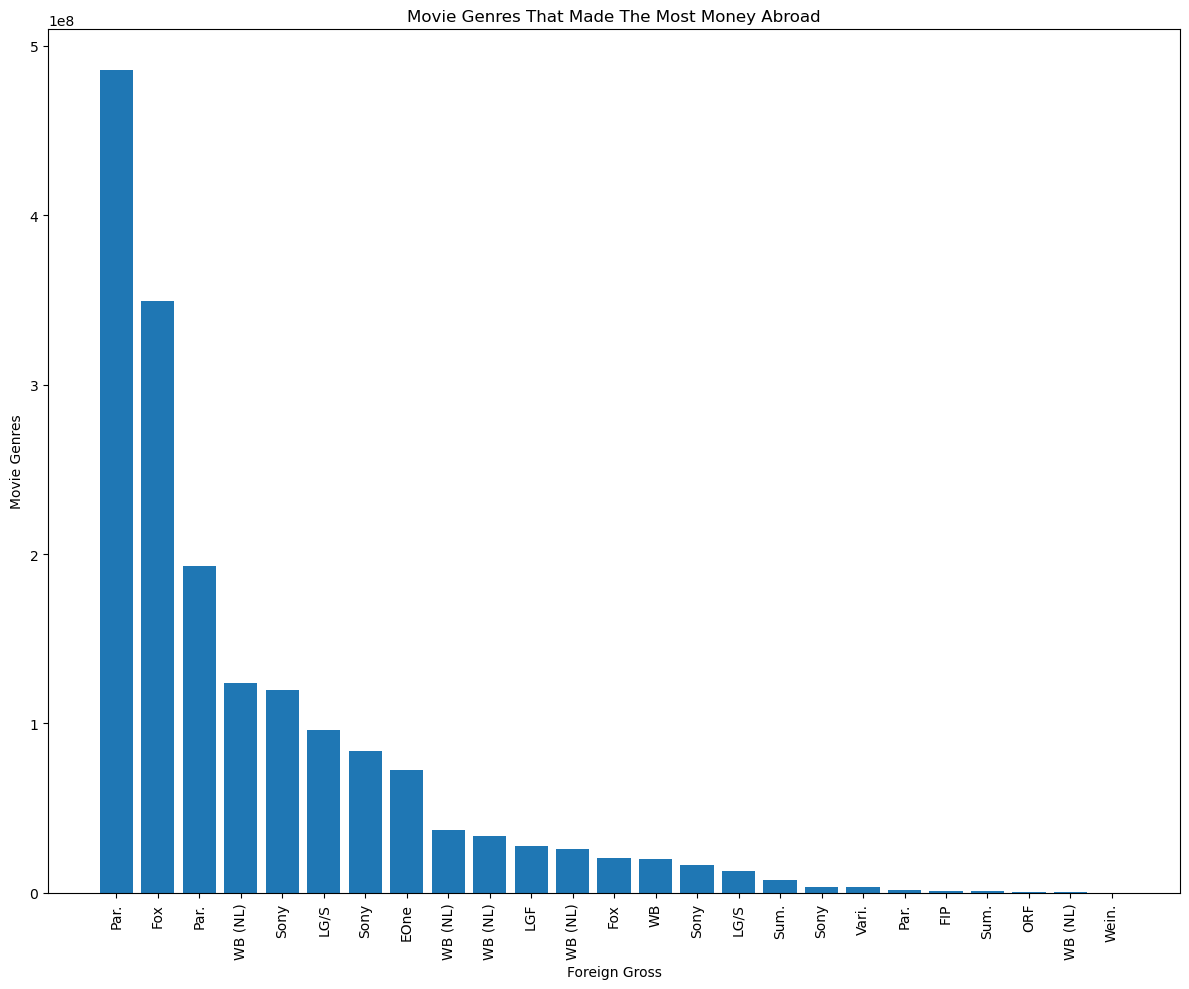

In [44]:
fig, ax7 = plt.subplots(figsize=(12, 10))
ax7.bar(x=for_gross['studio'], height=new_for_gross)
ax7.set_title("Movie Genres That Made The Most Money Abroad")
ax7.set_ylabel("Movie Genres")
ax7.set_xlabel("Foreign Gross")
ax7.set_xticklabels(for_gross['studio'], rotation=90)
plt.tight_layout()

### -> From The two graphs above for domestic and foreign gross, we can see the main competitors of Microsoft will be [Paramount, Fox, Warner Bros and Sony]

_________________________________________________________________________________________________________________________________________________________________________________________________

# 5.
### Lets see the top 50 genres that made the most money

In [45]:
# start with the ones that made the most money domestically
gen_gross = im_bom.groupby('title')[['genres','domestic_gross']].head(10)
gen_gross = gen_gross.sort_values('domestic_gross', ascending=False)
gen_gross

,genres,domestic_gross
0,"Action,Adventure,Sci-Fi",312400000.0
9,"Action,Adventure,Thriller",209400000.0
45,"Action,Adventure,Biography",183600000.0
22,"Action,Comedy,Crime",138400000.0
49,"Action,Comedy,Crime",127400000.0
...,...,...
33,"Action,Horror,Mystery",5500.0
18,"Comedy,Crime,History",4800.0
44,"Drama,Mystery,Sci-Fi",4300.0
21,Drama,2600.0


In [46]:
# finding out if domestic_gross has a NaN object
gen_gross.isna().sum()

genres            0
domestic_gross    1
dtype: int64

In [47]:
# Dropping the NaN values
gen_gross = gen_gross.dropna(subset=['domestic_gross'], axis=0, how="any")
new_dom_gross = [i for i in gen_gross['domestic_gross']]
new_dom_gross[:10]

[312400000.0,
 209400000.0,
 183600000.0,
 138400000.0,
 127400000.0,
 117500000.0,
 107100000.0,
 95300000.0,
 80600000.0,
 75600000.0]

/tmp/ipykernel_16283/1513393898.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(gen_gross['genres'], rotation=90)


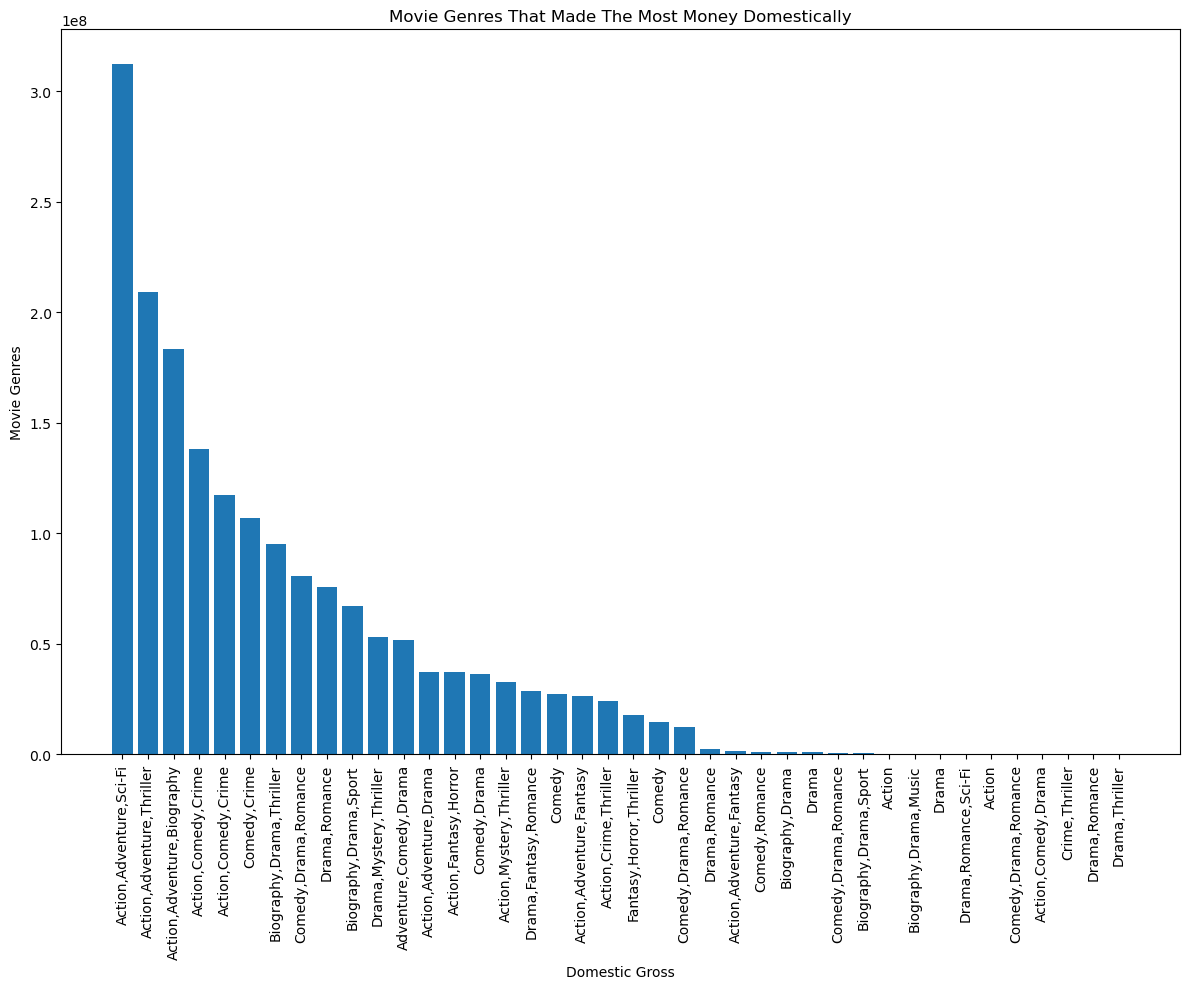

In [48]:
# visualizing the data
fig, ax4 = plt.subplots(figsize=(12, 10))
ax4.bar(x=gen_gross['genres'], height=new_dom_gross)
ax4.set_title("Movie Genres That Made The Most Money Domestically")
ax4.set_ylabel("Movie Genres")
ax4.set_xlabel("Domestic Gross")
ax4.set_xticklabels(gen_gross['genres'], rotation=90)
plt.tight_layout()

#### Let's do the same for Foreign Gross

In [49]:
im_bom['foreign_gross'] = im_bom['foreign_gross'].astype(float)
gen_for = im_bom.groupby('title')[['genres','foreign_gross']].head(10)
gen_for = gen_for.sort_values('foreign_gross', ascending=False)
gen_for

,genres,foreign_gross
9,"Action,Adventure,Thriller",485300000.0
45,"Action,Adventure,Biography",349300000.0
0,"Action,Adventure,Sci-Fi",311500000.0
1,"Comedy,Drama,Romance",193000000.0
2,"Drama,Romance",124000000.0
...,...,...
56,"Comedy,Drama",NaN
58,"Crime,Thriller",NaN
59,"Drama,Romance",NaN
60,"Drama,Thriller",NaN


In [50]:
### Scan for NaN values
gen_for.isna().sum()
# foreign_gross has NaN objects

genres            0
foreign_gross    15
dtype: int64

In [51]:
# Drop the Null values
gen_for = gen_for.dropna(subset=['foreign_gross'], axis=0, how="any")
new_gen_for = [i for i in gen_for['foreign_gross']]
new_gen_for[:10]

[485300000.0,
 349300000.0,
 311500000.0,
 193000000.0,
 124000000.0,
 119600000.0,
 111700000.0,
 96200000.0,
 92100000.0,
 89500000.0]

/tmp/ipykernel_16283/3982441591.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(gen_for['genres'], rotation=90)


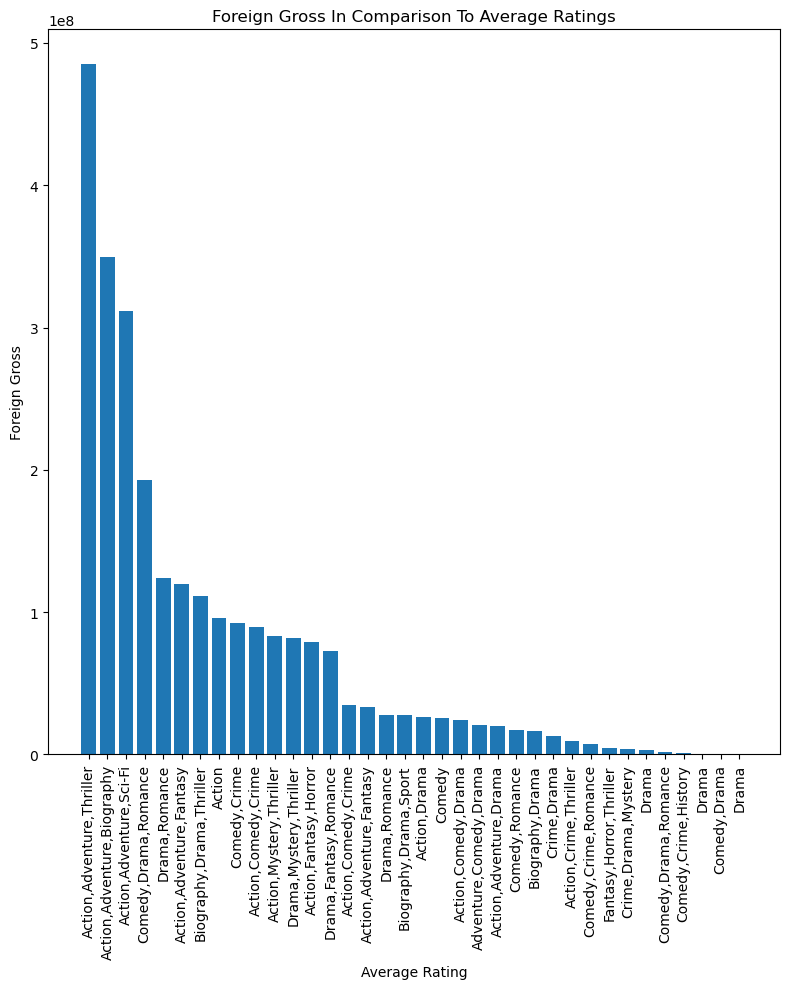

In [52]:
# Let's visualize it
fig, ax5 = plt.subplots(figsize=(8, 10))
ax5.bar(x=gen_for['genres'], height=new_gen_for)
ax5.set_title("Foreign Gross In Comparison To Average Ratings")
ax5.set_xlabel("Average Rating")
ax5.set_ylabel("Foreign Gross")
ax5.set_xticklabels(gen_for['genres'], rotation=90)
plt.tight_layout()

### -> Abroad Action related movies made more money than Drama oriented ones
### -> Movies that involve Action, Adventure, Sci-fi, thriller are the most popular category

In [77]:
###

# 6. Is There a Market?
#### AS the years are increasing is there market in the movie business. Let's investigate sales progression through the years

In [53]:
# create a dataframe with years and money
year_for = im_bom.groupby('title')[['year','foreign_gross']].head(10)
year_for = year_for.sort_values('year', ascending=True)
year_for

,year,foreign_gross
0,2010,311500000.0
1,2010,193000000.0
2,2010,124000000.0
3,2010,72500000.0
4,2010,26100000.0
...,...,...
57,2018,83600000.0
58,2018,NaN
59,2018,NaN
60,2018,NaN


In [54]:
# Let's clean the data
year_for = year_for.dropna(subset=['foreign_gross'], axis=0, how="any")
new_year_for = [i for i in year_for['foreign_gross']]
new_year_for[:10]

[311500000.0,
 193000000.0,
 124000000.0,
 72500000.0,
 26100000.0,
 37000000.0,
 17500000.0,
 24200000.0,
 393000.0,
 456000.0]

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


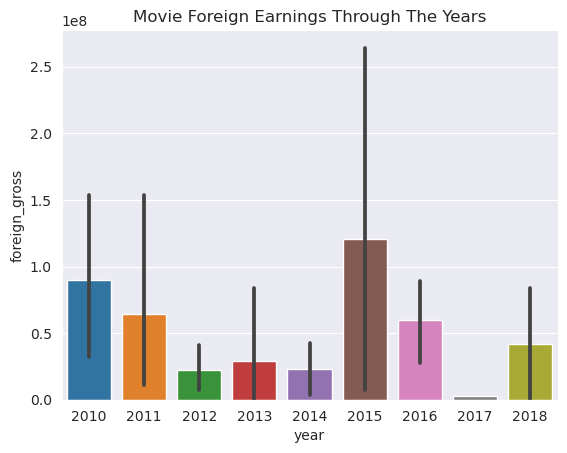

In [58]:
sns.barplot(data=year_for, x='year', y='foreign_gross').set(title='Movie Foreign Earnings Through The Years')
sns.set_style('darkgrid')

### DOMESTIC GROSS PROGRESSION OVER THE YEARS

In [59]:
year_dom = im_bom.groupby('title')[['year','domestic_gross']].head(10)
year_dom = year_dom.sort_values('year', ascending=True)
year_dom

,year,domestic_gross
0,2010,312400000.0
1,2010,95300000.0
2,2010,80600000.0
3,2010,32700000.0
4,2010,53000000.0
...,...,...
57,2018,36300000.0
58,2018,1200000.0
59,2018,901000.0
60,2018,800000.0


/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sampl

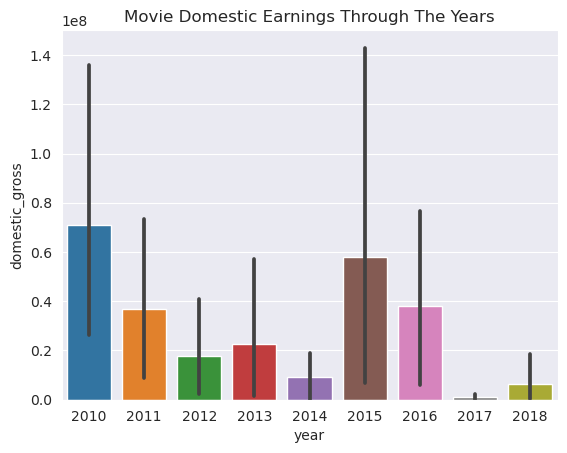

In [62]:
sns.barplot(data=year_dom, x='year', y='domestic_gross').set(title='Movie Domestic Earnings Through The Years')
sns.set_style('darkgrid')

### -> FROMTHE ABOVE WE CAN SEE THE SALES PROGRESSION IN THE LATTER YEARS BOTH DOMESTIC AND FOREIGN HAS BEEN SLOW

## RECOMMENDATIONS
### -> Microsoft Studio should be customer oriented and make movies from most popular genres eg Action movies
### -> Microsoft should make longer movies in Comparison to shorter movies in terms of time